In [4]:
import nltk
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer
import warnings
import nltk
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words =stopwords.words("russian")
stop_words1 = stopwords.words("english")
from collections import Counter
import string
nltk.download('punkt')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
import pymorphy2
from pymorphy2 import MorphAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
train_df = pd.read_csv("train.csv")

train_df.head()

,id,url,title,target
0,0,m.kp.md,"Экс-министр экономики Молдовы - главе МИДЭИ, ц...",False
1,1,www.kp.by,Эта песня стала известна многим телезрителям б...,False
2,2,fanserials.tv,Банши 4 сезон 2 серия Бремя красоты смотреть о...,False
3,3,colorbox.spb.ru,Не Беси Меня Картинки,False
4,4,tula-sport.ru,В Новомосковске сыграют следж-хоккеисты алекси...,False


In [6]:
test_df = pd.read_csv("test.csv")

test_df.head()

,id,url,title
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ..."
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ..."
4,135313,2gis.ru,67


In [4]:
# min_talk_len = 200

# train_df = train_df[train_df.title.str.len() <= min_talk_len].reset_index(drop=True)

# train_df.title.str.len().hist(bins=200);

In [5]:
X_train = train_df["title"].values
X_test = test_df["title"].values
y_train = train_df["target"].values.astype("int")
X_train = X_train.astype("str")
X_url = train_df["url"].values
X_url = X_url.astype("str")
X_url_test = test_df["url"].values
X_url_test = X_url_test.astype("str")

In [6]:
def Tokenized(X_train,X_url):
    res = []

    for i in range(X_train.shape[0]):
      res.append(word_tokenize(X_train[i]+X_url[i]))
    return res

X_tokenized = Tokenized(X_train,X_url)
X_tokenized_test = Tokenized(X_test,X_url_test)

In [7]:
def Lower_index(X):
  for i in range(len(X)):
    for j in range(len(X[i])):
      X[i][j]=X[i][j].lower()

  return X

X_lower = Lower_index(X_tokenized)
X_lower_test = Lower_index(X_tokenized_test)

In [8]:
X_lower[0][0]

'экс-министр'

In [9]:
def stopword(X):
  for x in X:
    for i in x:
      if i in stop_words or i in stop_words1 or i in string.punctuation:
        x.remove(i)
  return X
def stopwordsingle(x):
  for i in x:
    if i in stop_words or i in stop_words1:
        x.remove(i)
  return x
X_new = stopword(X_lower)
X_new_test = stopword(X_lower_test)
print(X_new_test[0])

['шестой', 'кассационный', 'суд', 'самаре', 'начнет', 'работу', 'разных', 'зданиях', '–', 'фото', '–', 'коммерсантъwww.kommersant.ru']


In [10]:
X_new[0][0]

'экс-министр'

In [11]:
snow = SnowballStemmer(language = 'russian')
def stemming_text(text):
    snow = SnowballStemmer(language = 'russian')
    lemmatized_text = []
    mimi=[]
    for word in text:
       for i in word:
         parsed_i = snow.stem(i)
         mimi.append(parsed_i)

       lemmatized_text.append(mimi)
       mimi = []
    return lemmatized_text

X_lem = stemming_text(X_new)
X_lem_test = stemming_text(X_new_test)

In [12]:
X_lem_copy = X_lem
X_lem_copy_test = X_lem_test


In [13]:
def Glue(X):
  mimi = []
  y = []
  for i in range(len(X)):
    for j in range(len(X[i])):
      if(j==0):
        mimi=X[i][j]
      else:
        mimi+=" "
        mimi+=X[i][j]
    y.append(mimi)
    mimi=[]
  return y

X_new = Glue(X_lem_copy)
X_new_test = Glue(X_lem_copy_test)
print(X_new[0])

экс-министр экономик молдов глав мидэ цел котор сдела республик просител а донор над избега долг нахожден н�м.кп.мд


In [14]:
for i in range(len(X_new)):
  X_new[i]=str(X_new[i])

for i in range(len(X_new_test)):
  X_new_test[i]=str(X_new_test[i])

In [15]:
X_new[0]

'экс-министр экономик молдов глав мидэ цел котор сдела республик просител а донор над избега долг нахожден н�м.кп.мд'

In [16]:
model = MultinomialNB()
from sklearn.svm import SVC  

model = SVC(kernel='linear', probability = False) 

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Создание модели с взвешиванием классов
model = RandomForestClassifier(class_weight=dict(enumerate(class_weights)))
tfidf_vectorizer = TfidfVectorizer(norm='l2')

tfidf_matrix = tfidf_vectorizer.fit_transform(X_new)

tfidf_matrix_test = tfidf_vectorizer.transform(X_new_test)

feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names.shape)


(204764,)


In [17]:
%%time

model.fit(
    tfidf_matrix,
    y_train
)

y_pred = model.predict(
    tfidf_matrix
)



CPU times: total: 24min 17s
Wall time: 24min 19s


In [18]:
f1_score(y_train, y_pred)

0.9996411268616544

In [19]:
test_df.columns = ['ID','url','title']

test_df["label"] = model.predict(tfidf_matrix_test)


test_df[["ID", "label"]].to_csv("ml_1.csv", index=False)

!cat ml_baseline.csv | head





"cat" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


In [196]:
# %%time

# model.fit(
#     tfidf_matrix,
#     y_train
# )

# y_pred = model.predict(
#     tfidf_matrix
# )



CPU times: total: 23.9 s
Wall time: 6.08 s


C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [197]:
# threshold = 0.32
# proba = model.predict_proba(tfidf_matrix)
# y_pred = (proba[:, 1] >= threshold).astype(int)
# fpr, tpr, thresholds = roc_curve(y_train, y_pred, pos_label=1)
    
# roc_auc = roc_auc_score(y_train, y_pred) 
# # print(roc_auc)
# print(f1_score(y_train, y_pred))
# # plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# # # roc curve for tpr = fpr  
# # plt.plot([0, 1], [0, 1], 'k--', label='Random classifier') 
# # plt.xlabel('False Positive Rate') 
# # plt.ylabel('True Positive Rate') 
# # plt.title('ROC Curve') 
# # plt.legend(loc="lower right") 
# # plt.show()  

0.9685649758896416


In [119]:
# # threshold = 0.4
# # proba = model.predict_proba(tfidf_matrix)
# # y_pred = (proba[:, 1] >= threshold).astype(int)

# # y_pred_prob = model.predict_proba(tfidf_matrix)[:, 1] 
# def best_threshold(model,tdidf_matrix,y_train):
#     a = 0
#     for thr in np.linspace(0,1,101):
#         proba = model.predict_proba(tfidf_matrix)
#         y_pred = (proba[:, 1] >= thr).astype(int)
#         roc_auc = roc_auc_score(y_train, y_pred) 
#         if(a<roc_auc):
#             a= roc_auc
#             thr_max = thr
#             print(thr_max)
            
#     print(roc_auc)
#     return thr_max
# threshold =best_threshold(model,tfidf_matrix,y_train)

0.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.2
0.21
0.5


In [111]:
# print(threshold)

1.0


In [198]:
# f1_score(y_train, y_pred)

0.9685649758896416

In [181]:
# test_df.head()

,ID,url,title,label
0,135309,www.kommersant.ru,Шестой кассационный суд в Самаре начнет работу...,0
1,135310,urexpert.online,"Что такое индексация алиментов, кем и в каких ...",0
2,135311,imperimeha.ru,Женщинам | Империя Меха - Part 12,0
3,135312,national-porn.com,"Небритые, волосатые киски: Порно всех стран и ...",1
4,135313,2gis.ru,67,0


In [225]:
# test_df.columns = ['ID','url','title']
# # test_df["label"] = model.predict(tfidf_matrix_test)

# threshold = 0.32
# proba = model.predict_proba(tfidf_matrix_test)
# y_pred = (proba[:, 1] >= threshold).astype(int)
# test_df["label"] = y_pred

# test_df[["ID", "label"]].to_csv("ml_1.csv", index=False)

# !cat ml_baseline.csv | head

AttributeError: predict_proba is not available when  probability=False

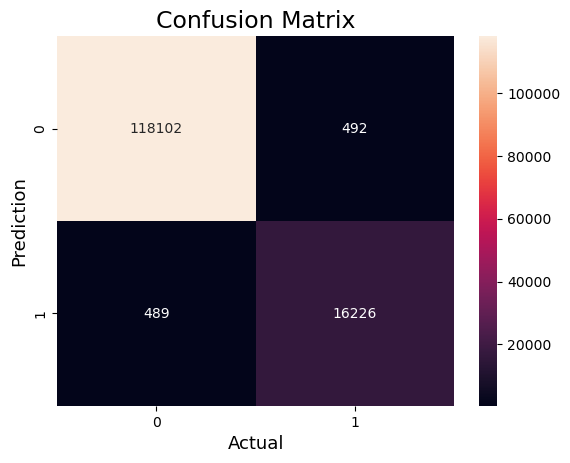

In [206]:
# threshold = 0.32
# proba = model.predict_proba(tfidf_matrix)
# y_pred = (proba[:, 1] >= threshold).astype(int)

# cm = confusion_matrix(y_train,y_pred)

# sns.heatmap(cm,annot=True,fmt='g')
# plt.ylabel('Prediction',fontsize=13)
# plt.xlabel('Actual',fontsize=13)
# plt.title('Confusion Matrix',fontsize=17)
# plt.show()